In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 3/DD.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 3/DD.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 3/DD'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 3/DD   
1    P:/CoxaAI/Sortering 3/DD   
2    P:/CoxaAI/Sortering 3/DD   
3    P:/CoxaAI/Sortering 3/DD   
4    P:/CoxaAI/Sortering 3/DD   
..                        ...   
204  P:/CoxaAI/Sortering 3/DD   
205  P:/CoxaAI/Sortering 3/DD   
206  P:/CoxaAI/Sortering 3/DD   
207  P:/CoxaAI/Sortering 3/DD   
208  P:/CoxaAI/Sortering 3/DD   

                                              filename parent_name  \
0    1.3.51.0.7.11282539731.26617.4424.34210.47167....  1-22060544   
1    1.3.51.0.7.11282539731.26617.4424.34210.47167....  1-22060544   
2    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...  1-22060544   
3    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...  1-22060544   
4    1.2.276.0.95.28994.1.20220629.100003.0.2.29641...  1-22061450   
..                                                 ...         ...   
204  1.3.6.1.4.1.19179.1.11641741842187116.3.12396....  1-23047086   
205  1.3.51.0.7.12387745104.53662.27208.35410.32815...  1-23047847   
206  1.3.51.0.7.12387745104.53662.27208.35410.32815...  1-23047847   
207  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...  1-23047847   
208  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...  1-23047847   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.11282539731.26617.4424.34210.47167....      885      998   
1    1.3.51.0.7.11282539731.26617.4424.34210.47167....      905     1017   
2    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...      844      958   
3    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...      856      967   
4    1.2.276.0.95.28994.1.20220629.100003.0.2.29641...      841     1054   
..                                                 ...      ...      ...   
204  1.3.6.1.4.1.19179.1.11641741842187116.3.12396....      816      974   
205  1.3.51.0.7.12387745104.53662.27208.35410.32815...     1022     1230   
206  1.3.51.0.7.12387745104.53662.27208.35410.32815...     1062     1266   
207  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...     1046     1252   
208  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...     1003     1207   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0        945     1029    0.938898       False          3            DD  
1        533      613    0.924864       False          3            DD  
2        969     1054    0.949288       False          3            DD  
3        561      640    0.875372       False          3            DD  
4        880     1032    0.996811       False          3            DD  
..       ...      ...         ...         ...        ...           ...  
204      336      465    0.000000        True          3            DD  
205     1487     1638    0.902715       False          3            DD  
206      716      865    0.892485       False          3            DD  
207      722      876    0.921979       False          3            DD  
208     1487     1636    0.833217       False          3            DD  

[209 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([73, 125, 160, 167, 168, 188, 203, 204], dtype='int64')

Note that there some cases that are not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

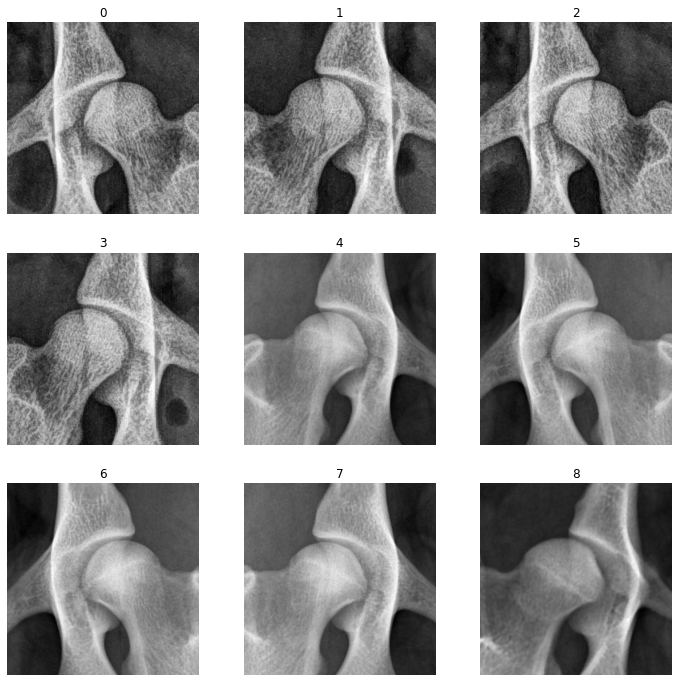

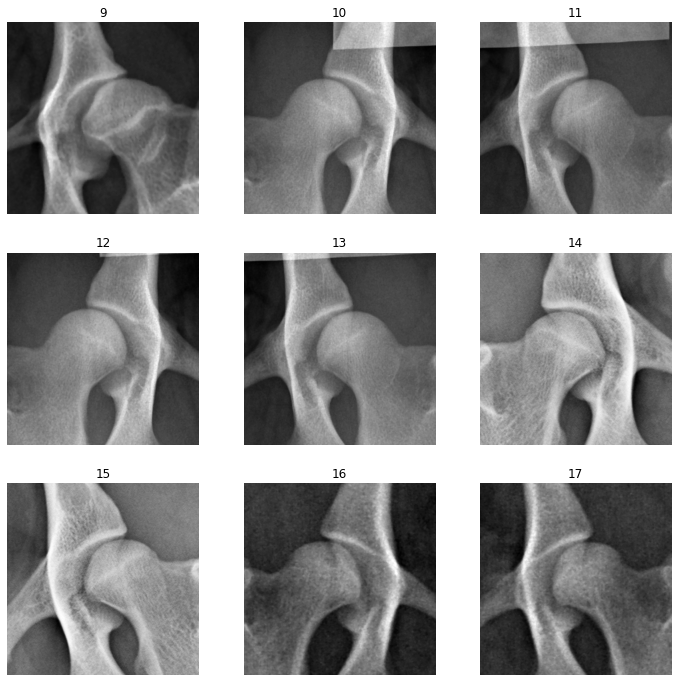

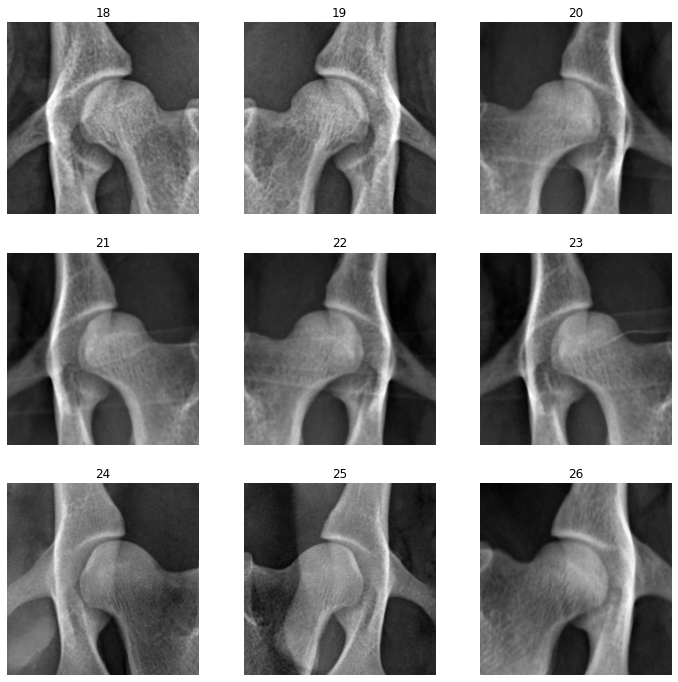

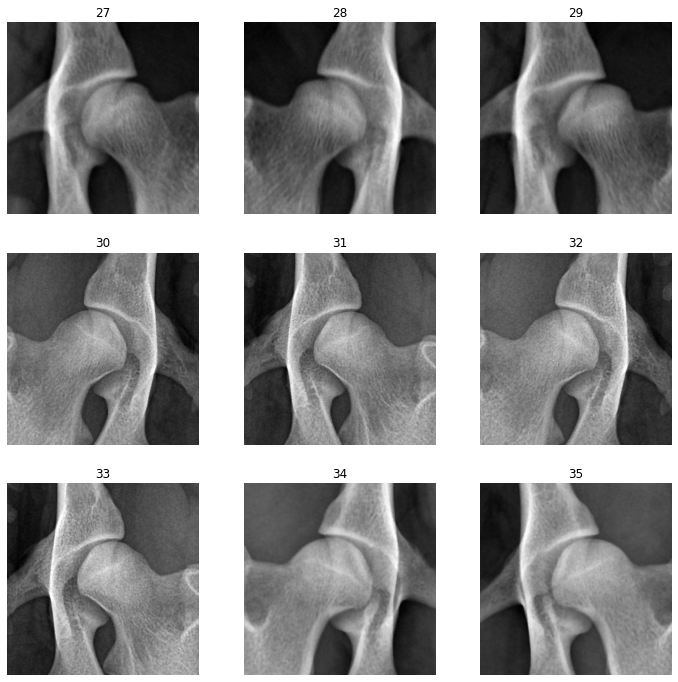

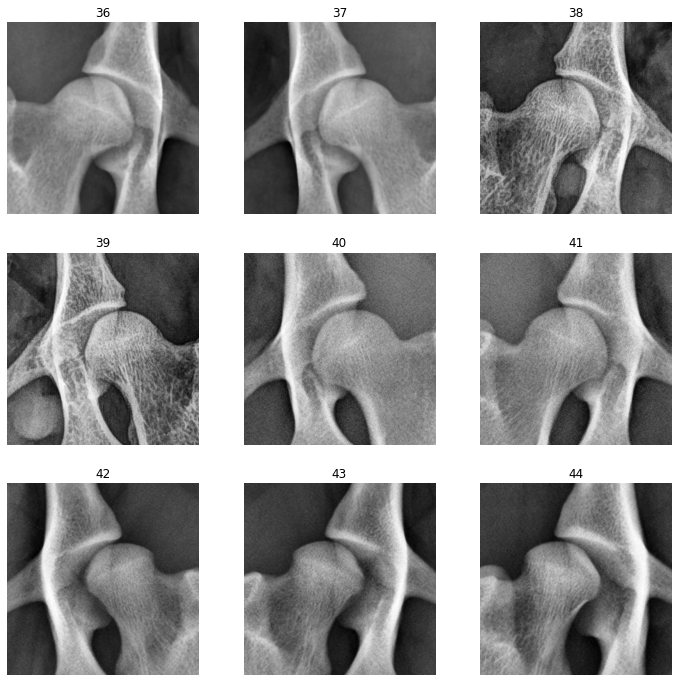

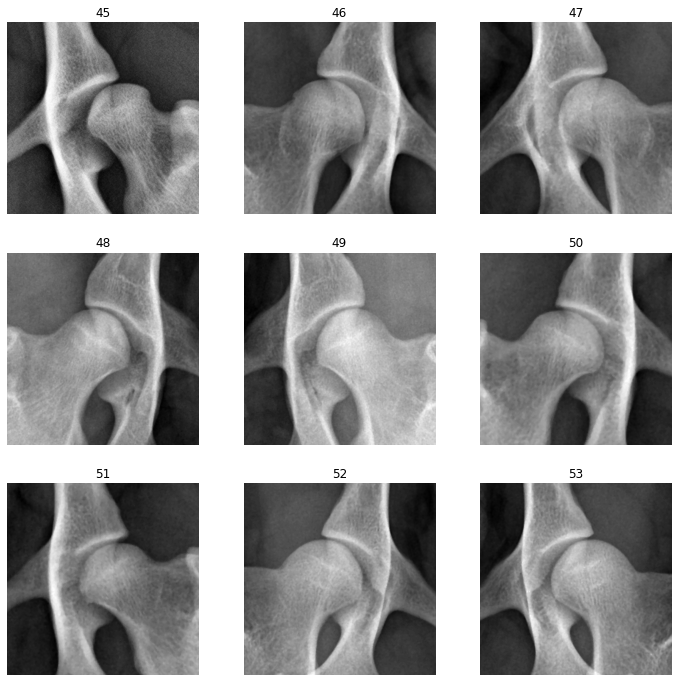

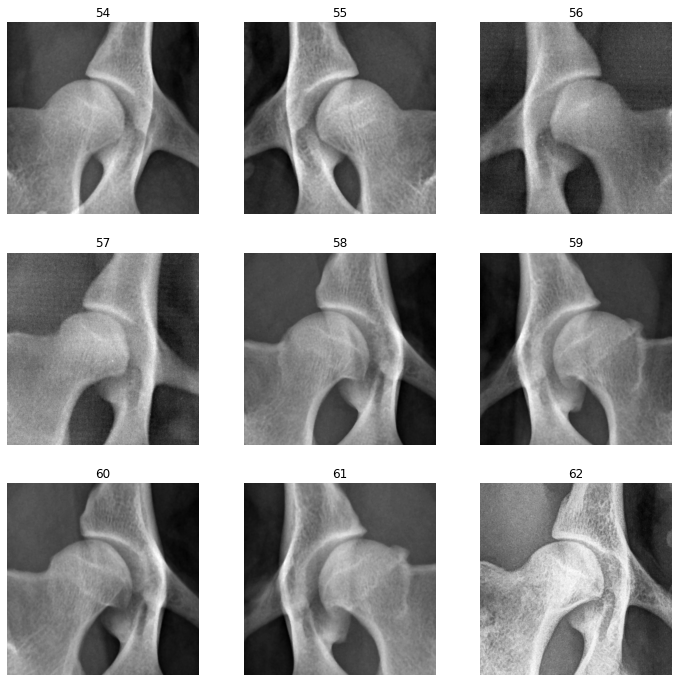

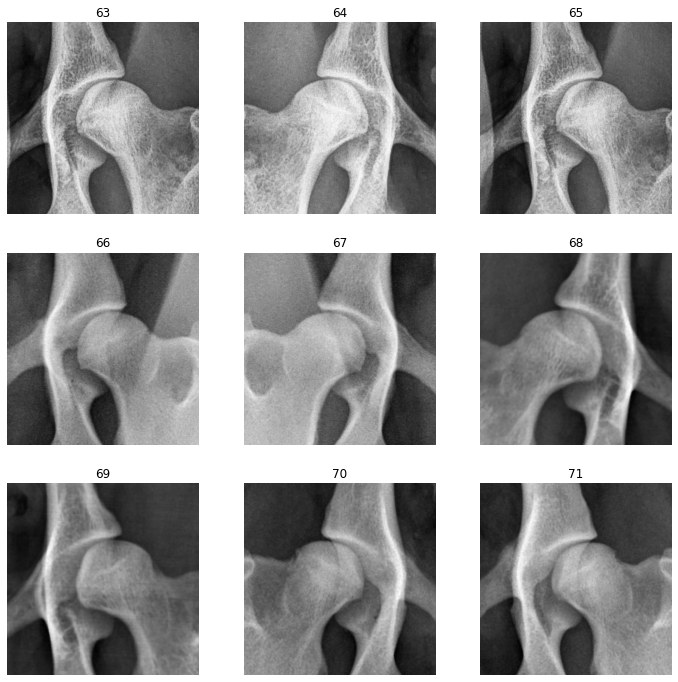

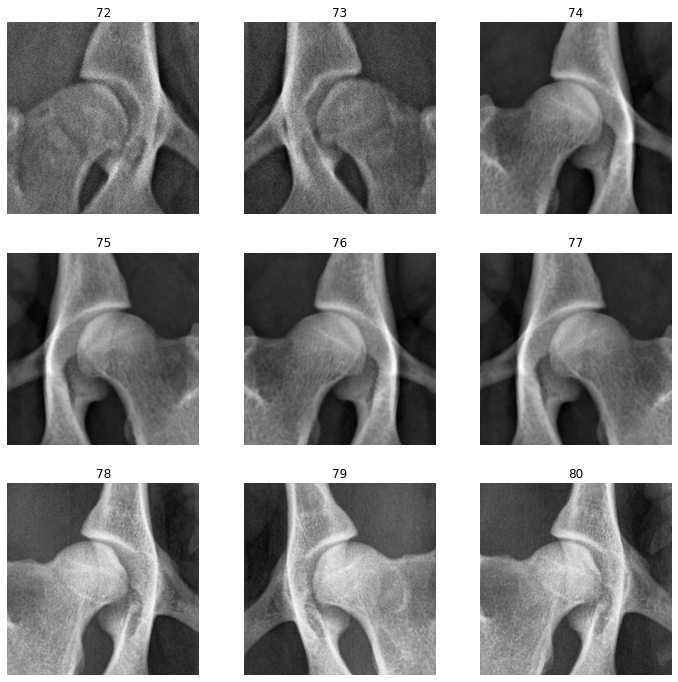

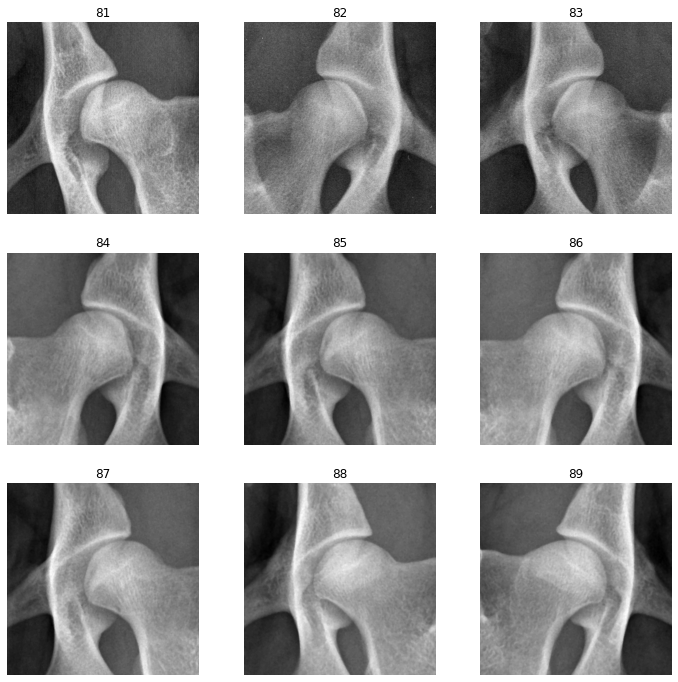

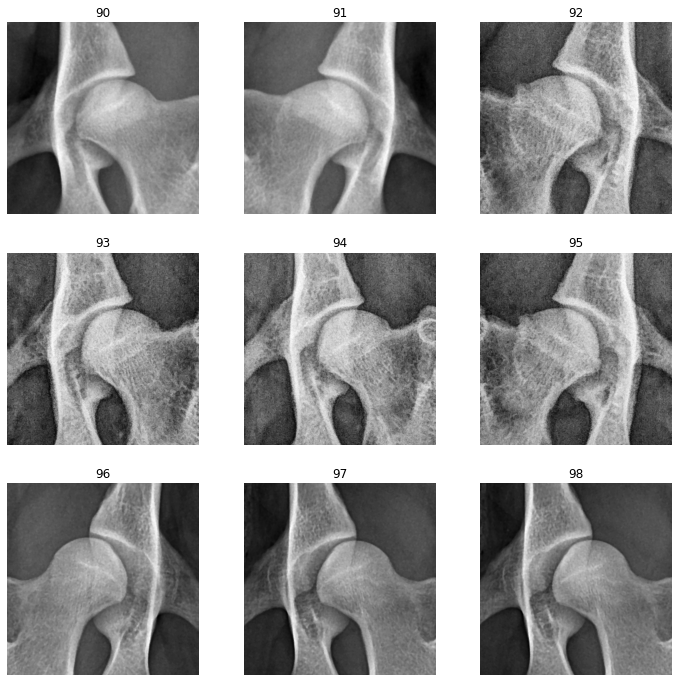

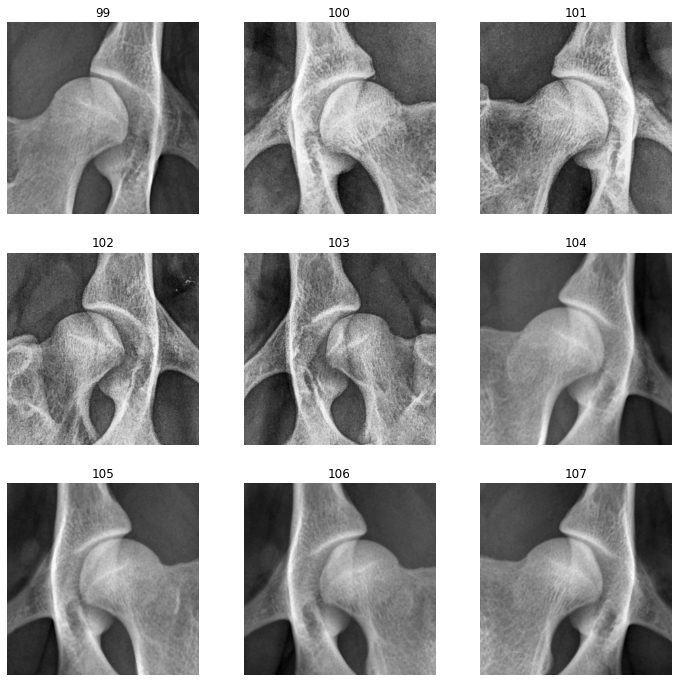

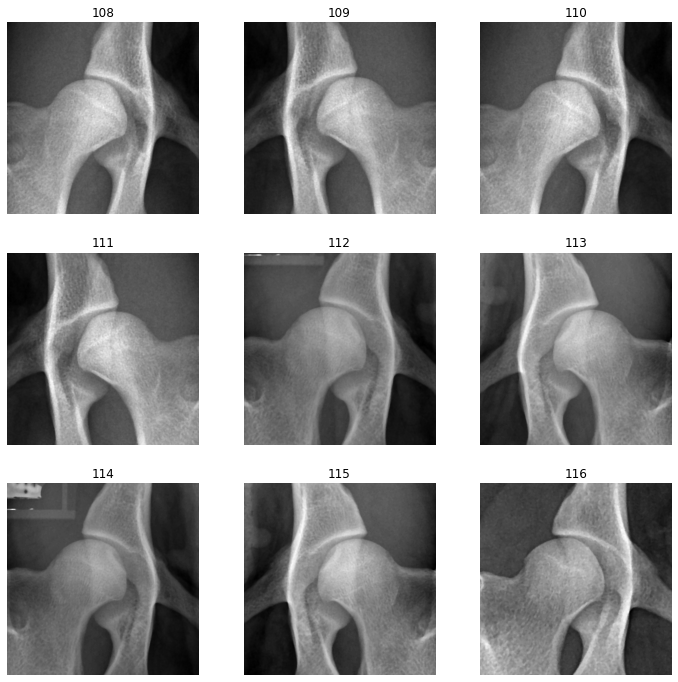

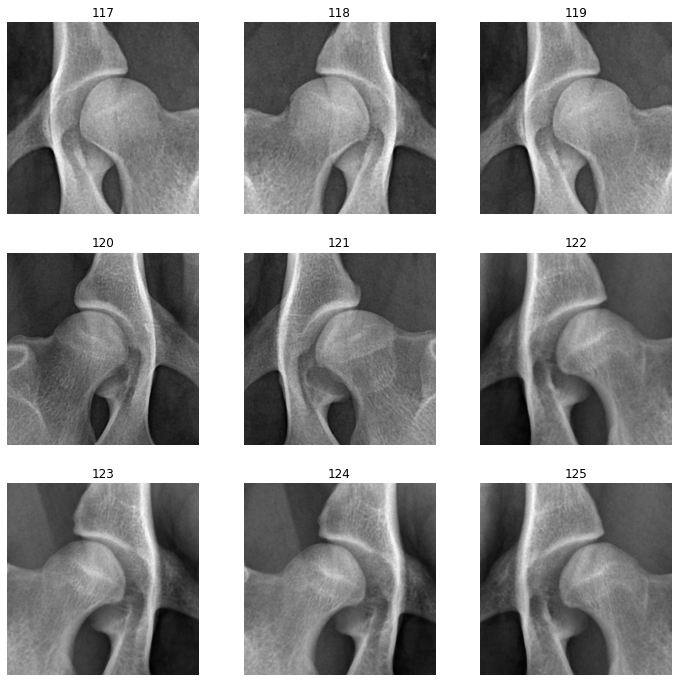

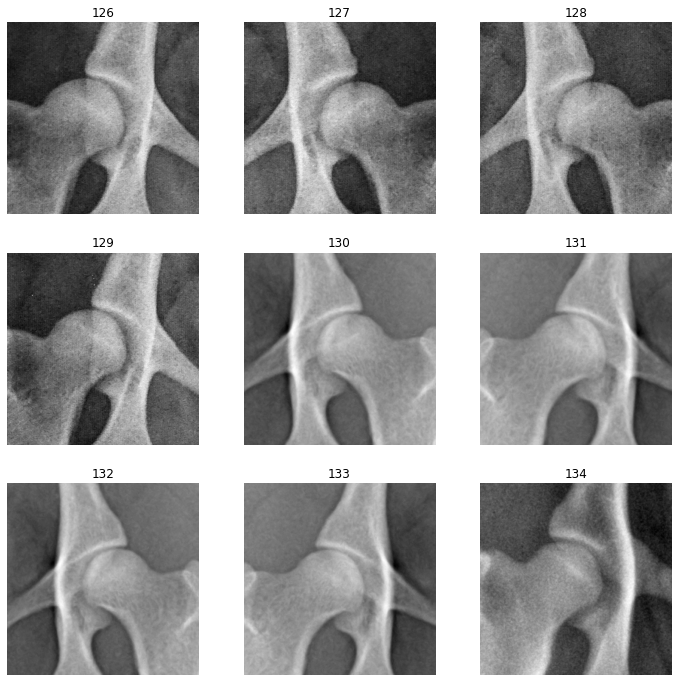

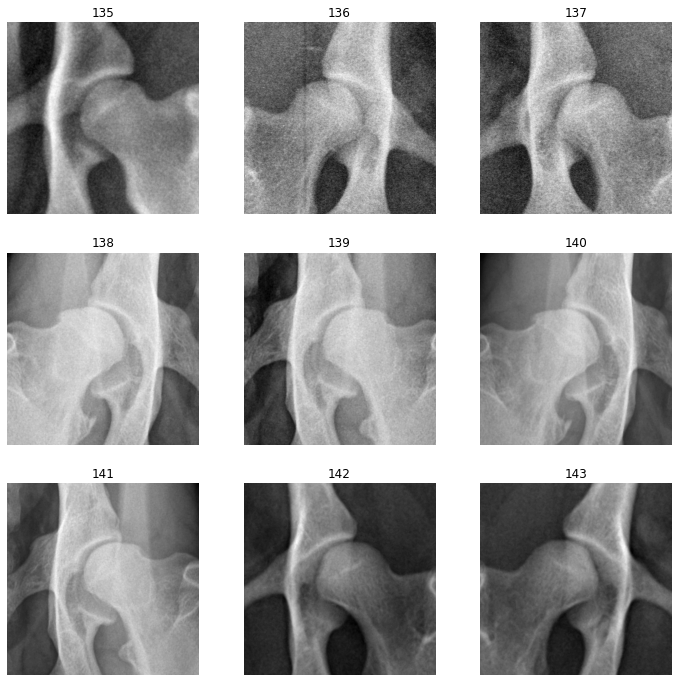

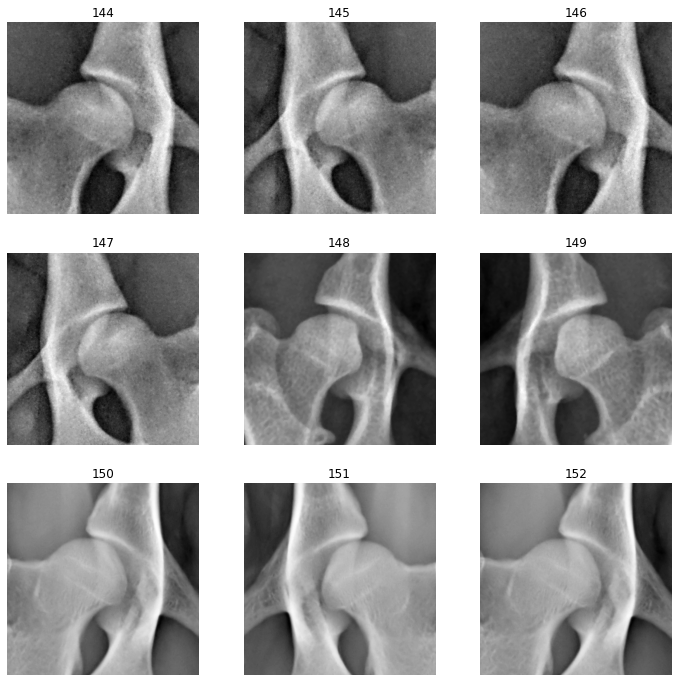

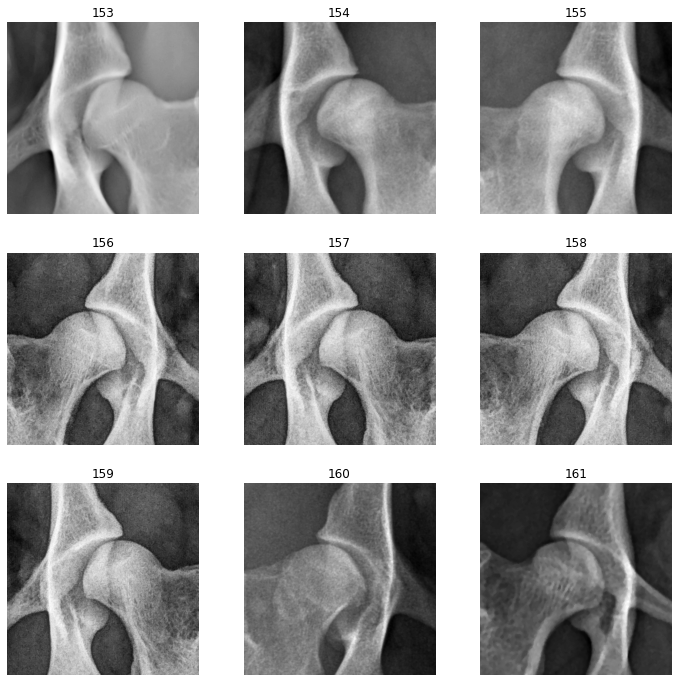

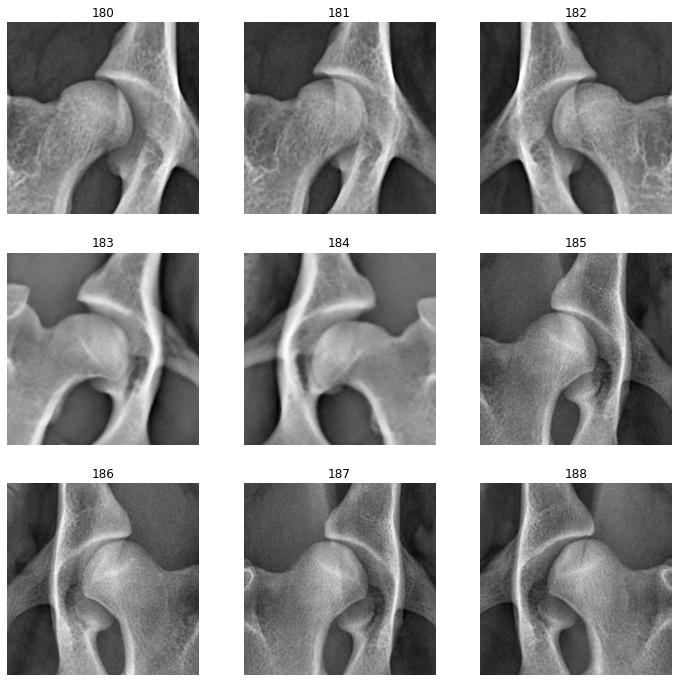

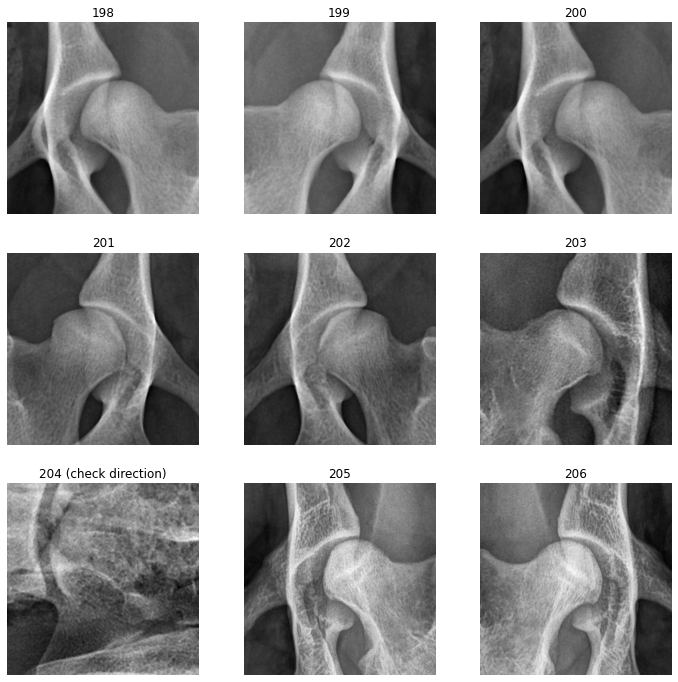

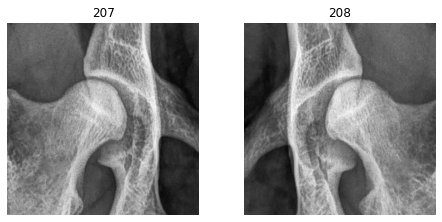

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = []
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = [204]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 3/DD   
1    P:/CoxaAI/Sortering 3/DD   
2    P:/CoxaAI/Sortering 3/DD   
3    P:/CoxaAI/Sortering 3/DD   
4    P:/CoxaAI/Sortering 3/DD   
..                        ...   
203  P:/CoxaAI/Sortering 3/DD   
205  P:/CoxaAI/Sortering 3/DD   
206  P:/CoxaAI/Sortering 3/DD   
207  P:/CoxaAI/Sortering 3/DD   
208  P:/CoxaAI/Sortering 3/DD   

                                              filename parent_name  \
0    1.3.51.0.7.11282539731.26617.4424.34210.47167....  1-22060544   
1    1.3.51.0.7.11282539731.26617.4424.34210.47167....  1-22060544   
2    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...  1-22060544   
3    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...  1-22060544   
4    1.2.276.0.95.28994.1.20220629.100003.0.2.29641...  1-22061450   
..                                                 ...         ...   
203  1.3.6.1.4.1.19179.1.11641741842187116.3.11654....  1-23047086   
205  1.3.51.0.7.12387745104.53662.27208.35410.32815...  1-23047847   
206  1.3.51.0.7.12387745104.53662.27208.35410.32815...  1-23047847   
207  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...  1-23047847   
208  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...  1-23047847   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.11282539731.26617.4424.34210.47167....      885      998   
1    1.3.51.0.7.11282539731.26617.4424.34210.47167....      905     1017   
2    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...      844      958   
3    1.3.51.0.7.2968416321.59015.3147.36872.6248.12...      856      967   
4    1.2.276.0.95.28994.1.20220629.100003.0.2.29641...      841     1054   
..                                                 ...      ...      ...   
203  1.3.6.1.4.1.19179.1.11641741842187116.3.11654....      816      974   
205  1.3.51.0.7.12387745104.53662.27208.35410.32815...     1022     1230   
206  1.3.51.0.7.12387745104.53662.27208.35410.32815...     1062     1266   
207  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...     1046     1252   
208  1.3.51.0.7.2648342728.4235.15172.39534.34602.3...     1003     1207   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0        945     1029    0.938898       False          3            DD   
1        533      613    0.924864       False          3            DD   
2        969     1054    0.949288       False          3            DD   
3        561      640    0.875372       False          3            DD   
4        880     1032    0.996811       False          3            DD   
..       ...      ...         ...         ...        ...           ...   
203      336      465    0.406653       False          3            DD   
205     1487     1638    0.902715       False          3            DD   
206      716      865    0.892485       False          3            DD   
207      722      876    0.921979       False          3            DD   
208     1487     1636    0.833217       False          3            DD   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
203    False  
205    False  
206    False  
207    False  
208    False  

[208 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(208, 13)


In [13]:
new_detection_df.to_csv(filename_clean, index=False)

In [14]:
detection_df[detection_df.index.isin(remove_indice)]

base_path  \
204  P:/CoxaAI/Sortering 3/DD   

                                              filename parent_name  \
204  1.3.6.1.4.1.19179.1.11641741842187116.3.12396....  1-23047086   

                                             crop_name  ax0_min  ax0_max  \
204  1.3.6.1.4.1.19179.1.11641741842187116.3.12396....      816      974   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
204      336      465         0.0        True          3            DD   

     flipped  
204    False